In [24]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Virtual Try-On: Image Generation


<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/virtual_try_on.ipynb">
      <img src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fvirtual_try_on.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/virtual_try_on.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/virtual_try_on.ipynb">
      <img width="32px" src="https://raw.githubusercontent.com/primer/octicons/refs/heads/main/icons/mark-github-24.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/virtual_try_on.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/virtual_try_on.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/virtual_try_on.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/virtual_try_on.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/virtual_try_on.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            

| Authors |
| --- |
| [Jorj Ismailyan](https://github.com/jismailyan-google) |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Virtual Try-On

[Virtual Try-On](https://cloud.google.com/vertex-ai/generative-ai/docs/image/generate-virtual-try-on-images) uses Google's cutting-edge image generation models to create high-quality images of people virtually trying on clothes. By providing an image of a model and a clothing item, you can generate a new image of the model wearing that product.

In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with the Virtual Try-On model to:
- Try-on multiple clothing items from locally stored images
- Try-on a clothing item in Cloud Storage with an Imagen generated person

Learn more about [quotas](https://cloud.google.com/vertex-ai/generative-ai/docs/models/imagen/virtual-try-on-preview-08-04) and [pricing](https://cloud.google.com/vertex-ai/generative-ai/pricing#imagen-models) for Virtual Try-On in the product documentation.

## Get started

### Install Google Gen AI SDK for Python

In [25]:
%pip install --upgrade --quiet google-genai

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [26]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [27]:
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps
from google import genai
from google.genai.types import (
    GenerateImagesConfig,
    Image,
    ProductImage,
    RecontextImageConfig,
    RecontextImageSource,
)
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [28]:
import os

PROJECT_ID = "test-vto-481008"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Define helper functions to display media

In [29]:
def display_image(
    image,
    max_width: int = 700,
    max_height: int = 400,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)


def display_local_image(
    images: list[str],
) -> None:
    fig, axes = plt.subplots(1, len(images), figsize=(12, 6))
    if len(images) == 1:
        axes = np.array([axes])
    for i, ax in enumerate(axes):
        image = img.imread(images[i])
        ax.imshow(image)
        ax.axis("off")
    plt.show()

### Load the image models

In [30]:
virtual_try_on = "virtual-try-on-preview-08-04"
image_generation = "imagen-4.0-generate-001"

## Virtual Try-On with local files

In this section, you'll download images of a person and clothing items to try them on from local files.

Supported Clothing:
  - **Tops:** shirts, hoodies, sweaters, tank tops, blouses
  - **Bottoms:** pants, leggings, shorts, skirts
  - **Footwear:** sneakers, boots, sandals, flats, heels, formal shoes


### Download an image of a person

First, download an image of a person. The following example uses an image from Cloud Storage. If you prefer to use a different image, you can either change the URL in the `wget` command or, if you have a local file, update the `person_image` variable in the subsequent step.

In [31]:
!wget https://storage.googleapis.com/cloud-samples-data/generative-ai/image/man-in-field.png

--2025-12-12 08:58:45--  https://storage.googleapis.com/cloud-samples-data/generative-ai/image/man-in-field.png
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 173.194.210.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1582357 (1.5M) [image/png]
Saving to: ‘man-in-field.png.2’

man-in-field.png.2  100%[===================>]   1.51M  --.-KB/s    in 0.01s   

2025-12-12 08:58:45 (136 MB/s) - ‘man-in-field.png.2’ saved [1582357/1582357]



If you'd like to use a different local image, modify the file name in `person_image`.

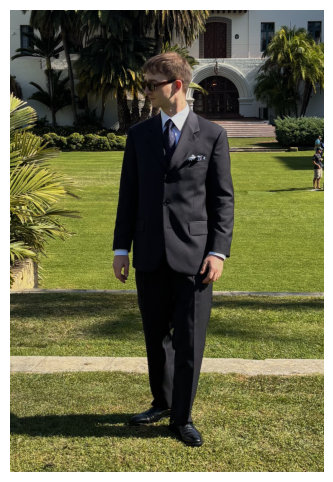

In [38]:
person_image = "inputVTO_gio.jpeg"  # @param {type: 'string'}

display_local_image([person_image])

### Download clothing images

Next, download the clothing images. The examples below are stored in Cloud Storage, but you can use your own by modifying the URLs or by specifying the paths to local images in the next step.

In [39]:
!wget https://storage.googleapis.com/cloud-samples-data/generative-ai/image/sweater.jpg

!wget https://storage.googleapis.com/cloud-samples-data/generative-ai/image/trousers.jpg

--2025-12-12 09:01:00--  https://storage.googleapis.com/cloud-samples-data/generative-ai/image/sweater.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 173.194.210.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368747 (360K) [image/jpeg]
Saving to: ‘sweater.jpg.3’

sweater.jpg.3       100%[===================>] 360.10K  --.-KB/s    in 0.003s  

2025-12-12 09:01:00 (121 MB/s) - ‘sweater.jpg.3’ saved [368747/368747]

--2025-12-12 09:01:00--  https://storage.googleapis.com/cloud-samples-data/generative-ai/image/trousers.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 173.194.210.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272495 (266K) [image/jpeg]
Saving to: ‘trousers

If you'd like to use a different top, modify the file name in `top_image`. The same goes for the file name in `bottom_image`.

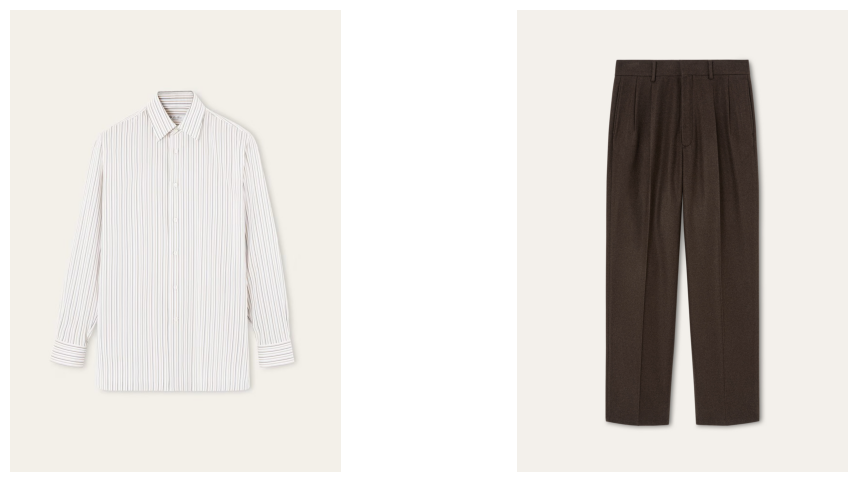

In [40]:
top_image = "shirt.jpg"  # @param {type: 'string'}
bottom_image = "trousers.jpg"  # @param {type: 'string'}

display_local_image([top_image, bottom_image])

### Send the request

With the Virtual Try-On model, you can only specify one clothing item to try on at a time. Since this example has two clothing items, you'll need to make two separate requests. In each call, you can specify the following parameters in addition to the `person_image` and `product_images`:
 - **Number of images:** 1 - 4

You'll save the output image locally so that it can be referenced in the next step.

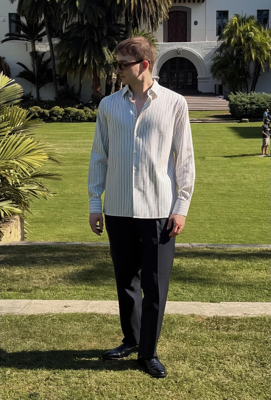

In [41]:
response = client.models.recontext_image(
    model=virtual_try_on,
    source=RecontextImageSource(
        person_image=Image.from_file(location=person_image),
        product_images=[
            ProductImage(product_image=Image.from_file(location=top_image))
        ],
    ),
    config=RecontextImageConfig(
        output_mime_type="image/jpeg",
        number_of_images=1,
        safety_filter_level="BLOCK_LOW_AND_ABOVE",
    ),
)

response.generated_images[0].image.save("try-on.jpeg")
display_image(response.generated_images[0].image)

When generating images you can also set the `safety_filter_level` parameter accordingly:
- `safety_filter_level`
  - `BLOCK_LOW_AND_ABOVE`
  - `BLOCK_MEDIUM_AND_ABOVE`
  - `BLOCK_ONLY_HIGH`
  - `BLOCK_NONE`

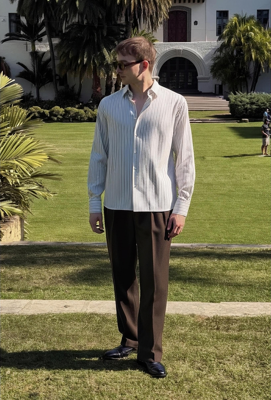

In [42]:
response = client.models.recontext_image(
    model=virtual_try_on,
    source=RecontextImageSource(
        person_image=Image.from_file(location="try-on.jpeg"),
        product_images=[
            ProductImage(product_image=Image.from_file(location=bottom_image))
        ],
    ),
    config=RecontextImageConfig(
        output_mime_type="image/jpeg",
        number_of_images=1,
        safety_filter_level="BLOCK_LOW_AND_ABOVE",
    ),
)
display_image(response.generated_images[0].image)

## Virtual Try-On with files in Cloud Storage

In this section, you'll use images of a clothing item stored in Cloud Storage and a person generated with Imagen for virtual try-on.

### Generate an image of a person

In this example, you'll generate a person to try on the clothing item with Imagen. Run the step below and change the prompt if you see fit.

In [37]:
prompt = """
A high-resolution, full-body, head-on photograph of a woman standing in a brightly lit professional photography studio wearing a dress. The backdrop is clean gray paper.
"""

image = client.models.generate_images(
    model=image_generation,
    prompt=prompt,
    config=GenerateImagesConfig(
        output_mime_type="image/jpeg",
        number_of_images=1,
        image_size="2K",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
    ),
)
display_image(image.generated_images[0].image)

KeyboardInterrupt: 

### View clothing image

Here, you'll view the clothing image that is stored in Cloud Storage. If you'd like, you can modify the URL below to use a different image in Cloud Storage.

In [ ]:
clothing_image = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/dress.jpg"
    )
)

# Display the image
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(clothing_image)
for ax in axis:
    ax.axis("off")
plt.show()

### Send the request

By default, a digital watermark, or [SynthID](https://deepmind.google/technologies/synthid/), is added to images. If you would like to explicitly set the watermark to True, you can do so with the `add_watermark` parameter. You can also [verify a watermarked image](https://cloud.google.com/vertex-ai/generative-ai/docs/image/verify-watermark) via Vertex AI Studio.

In [ ]:
response = client.models.recontext_image(
    model=virtual_try_on,
    source=RecontextImageSource(
        person_image=image.generated_images[0].image,
        product_images=[
            ProductImage(
                product_image=Image(
                    gcs_uri="gs://cloud-samples-data/generative-ai/image/dress.jpg"
                )
            )
        ],
    ),
    config=RecontextImageConfig(
        output_mime_type="image/jpeg",
        number_of_images=1,
        safety_filter_level="BLOCK_LOW_AND_ABOVE",
    ),
)
display_image(response.generated_images[0].image)